In [ ]:
import tensorflow as tf

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
len(tf.config.list_physical_devices('GPU'))

1

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tensorflow
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras import callbacks
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import random
import cv2
import os
from imutils import paths
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis/Dataset/RAW/dataset_halfSecondWindow.csv')
df

,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,156661,3,NaN,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,156662,4,NaN,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,156663,5,NaN,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,156664,6,NaN,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,156665,7,NaN,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,82695,4066,NaN,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.834765,...,89.761985,89.761985,89.761985,NaN,0.00,0.00,0.00,NaN,Walking,U1
62581,77608,604,NaN,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.965309,...,89.747010,89.747010,89.747010,NaN,1.50,1.50,1.50,NaN,Walking,U1
62582,85219,1341,NaN,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.773370,...,89.729460,89.729460,89.729460,NaN,0.00,0.00,0.00,NaN,Walking,U1
62583,69368,1186,NaN,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.789832,...,89.778343,89.778343,89.778343,NaN,1.00,1.00,1.00,NaN,Walking,U1


In [ ]:
column_lst = list(df.columns)
mostly_null = []
partially_null = []
no_null = []

In [ ]:
print(column_lst)

['id', 'time', 'activityrecognition#0', 'activityrecognition#1', 'android.sensor.accelerometer#mean', 'android.sensor.accelerometer#min', 'android.sensor.accelerometer#max', 'android.sensor.accelerometer#std', 'android.sensor.game_rotation_vector#mean', 'android.sensor.game_rotation_vector#min', 'android.sensor.game_rotation_vector#max', 'android.sensor.game_rotation_vector#std', 'android.sensor.gravity#mean', 'android.sensor.gravity#min', 'android.sensor.gravity#max', 'android.sensor.gravity#std', 'android.sensor.gyroscope#mean', 'android.sensor.gyroscope#min', 'android.sensor.gyroscope#max', 'android.sensor.gyroscope#std', 'android.sensor.gyroscope_uncalibrated#mean', 'android.sensor.gyroscope_uncalibrated#min', 'android.sensor.gyroscope_uncalibrated#max', 'android.sensor.gyroscope_uncalibrated#std', 'android.sensor.light#mean', 'android.sensor.light#min', 'android.sensor.light#max', 'android.sensor.light#std', 'android.sensor.linear_acceleration#mean', 'android.sensor.linear_acceler

In [ ]:
for i in column_lst:
    percentage = (df[i].isnull().sum()*100)/62585
    if percentage >= 60:
        mostly_null.append(i)
    elif df[i].isnull().sum() > 0:
        partially_null.append(i)
    elif df[i].isnull().sum() == 0:
        no_null.append(i)

    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 62585")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: id
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: time
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  62585 out of 62585
Missing percentage:100.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  2 out of 62585
Missing percentage:0.003195653910681473%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  8585 out of 62585
Missing percentage:13.717344411600223%

Feat

In [ ]:
if len(mostly_null)+len(partially_null)+len(no_null) == len(column_lst):
    print("True")
else:
    print("False")

True


In [ ]:
mostly_null

['activityrecognition#0',
 'android.sensor.light#std',
 'android.sensor.pressure#mean',
 'android.sensor.pressure#min',
 'android.sensor.pressure#max',
 'android.sensor.pressure#std',
 'android.sensor.proximity#mean',
 'android.sensor.proximity#min',
 'android.sensor.proximity#max',
 'android.sensor.proximity#std',
 'android.sensor.step_counter#mean',
 'android.sensor.step_counter#min',
 'android.sensor.step_counter#max',
 'android.sensor.step_counter#std',
 'sound#std',
 'speed#std']

In [ ]:
for i in mostly_null:
    df = df.drop([i], axis = 1)

In [ ]:
df = df.drop(['id'], axis = 1)

In [ ]:
partially_null

['android.sensor.accelerometer#std',
 'android.sensor.game_rotation_vector#mean',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#std',
 'android.sensor.gravity#mean',
 'android.sensor.gravity#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#std',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#mean',
 'android.sensor.light#min',
 'android.sensor.light#max',
 'android.sensor.linear_acceleration#mean',
 'android.sensor.linear_acceleration#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#std',
 'android.sensor.magnetic_field#mean',
 'android.sensor.magnetic_field#min',
 'and

In [ ]:
for i in partially_null:
    print("Partially Null Feature Name:",i)
    print("Number of unique values: ",len(df[i].unique()),"and Number of missing values: ",df[i].isnull().sum())
    print()

Partially Null Feature Name: android.sensor.accelerometer#std
Number of unique values:  47810 and Number of missing values:  2

Partially Null Feature Name: android.sensor.game_rotation_vector#mean
Number of unique values:  35432 and Number of missing values:  8585

Partially Null Feature Name: android.sensor.game_rotation_vector#min
Number of unique values:  35031 and Number of missing values:  8585

Partially Null Feature Name: android.sensor.game_rotation_vector#max
Number of unique values:  35033 and Number of missing values:  8585

Partially Null Feature Name: android.sensor.game_rotation_vector#std
Number of unique values:  12710 and Number of missing values:  10662

Partially Null Feature Name: android.sensor.gravity#mean
Number of unique values:  8433 and Number of missing values:  5534

Partially Null Feature Name: android.sensor.gravity#min
Number of unique values:  8849 and Number of missing values:  5534

Partially Null Feature Name: android.sensor.gravity#max
Number of uni

In [ ]:
for i in partially_null:
    df[i] = df[i].fillna(0)

In [ ]:
newcolumns = list(df.columns)

In [ ]:
for i in newcolumns:
    
    print('Feature Name:',i)
    print("Number of missing values: ",df[i].isnull().sum(),"out of 62585")
    print("Missing percentage:"+str(percentage)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#min
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#max
Number of missing values:  0 out of 62585
Missing percent

In [ ]:
df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,speed#mean,speed#min,speed#max,target,user
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,0.762086,0.114439,...,0.809349,0.137706,0.000000,0.000000,0.000000,0.00,0.00,0.00,Bus,U12
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,0.654833,0.079211,...,0.997289,0.046025,0.000000,0.000000,0.000000,0.00,0.00,0.00,Bus,U12
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,0.713222,0.033566,...,0.981119,0.026574,0.000000,0.000000,0.000000,0.00,0.00,0.00,Bus,U12
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,0.748520,0.014745,...,0.938264,0.014528,0.000000,0.000000,0.000000,0.00,0.00,0.00,Bus,U12
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,0.749263,0.018754,...,0.972659,0.021917,0.000000,0.000000,0.000000,0.00,0.00,0.00,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.834765,0.834765,0.000162,...,0.837442,0.000220,89.761985,89.761985,89.761985,0.00,0.00,0.00,Walking,U1
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.965309,0.965309,0.012192,...,0.980068,0.002820,89.747010,89.747010,89.747010,1.50,1.50,1.50,Walking,U1
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.773370,0.773370,0.014168,...,0.978259,0.000834,89.729460,89.729460,89.729460,0.00,0.00,0.00,Walking,U1
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.789832,0.789832,0.005423,...,0.787902,0.012880,89.778343,89.778343,89.778343,1.00,1.00,1.00,Walking,U1


In [ ]:
df['target'].unique()

array(['Bus', 'Car', 'Still', 'Train', 'Walking'], dtype=object)

In [ ]:
df['target'] = df['target'].map({'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}) 

In [ ]:
df = df.drop(['user'], axis = 1)

In [ ]:
df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,android.sensor.game_rotation_vector#max,android.sensor.game_rotation_vector#std,...,android.sensor.rotation_vector#min,android.sensor.rotation_vector#max,android.sensor.rotation_vector#std,sound#mean,sound#min,sound#max,speed#mean,speed#min,speed#max,target
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,0.762086,0.114439,...,0.389123,0.809349,0.137706,0.000000,0.000000,0.000000,0.00,0.00,0.00,0
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,0.654833,0.079211,...,0.817395,0.997289,0.046025,0.000000,0.000000,0.000000,0.00,0.00,0.00,0
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,0.713222,0.033566,...,0.892086,0.981119,0.026574,0.000000,0.000000,0.000000,0.00,0.00,0.00,0
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,0.748520,0.014745,...,0.891509,0.938264,0.014528,0.000000,0.000000,0.000000,0.00,0.00,0.00,0
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,0.749263,0.018754,...,0.888596,0.972659,0.021917,0.000000,0.000000,0.000000,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.834765,0.834765,0.000162,...,0.837442,0.837442,0.000220,89.761985,89.761985,89.761985,0.00,0.00,0.00,4
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.965309,0.965309,0.012192,...,0.980068,0.980068,0.002820,89.747010,89.747010,89.747010,1.50,1.50,1.50,4
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.773370,0.773370,0.014168,...,0.978259,0.978259,0.000834,89.729460,89.729460,89.729460,0.00,0.00,0.00,4
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.789832,0.789832,0.005423,...,0.787902,0.787902,0.012880,89.778343,89.778343,89.778343,1.00,1.00,1.00,4


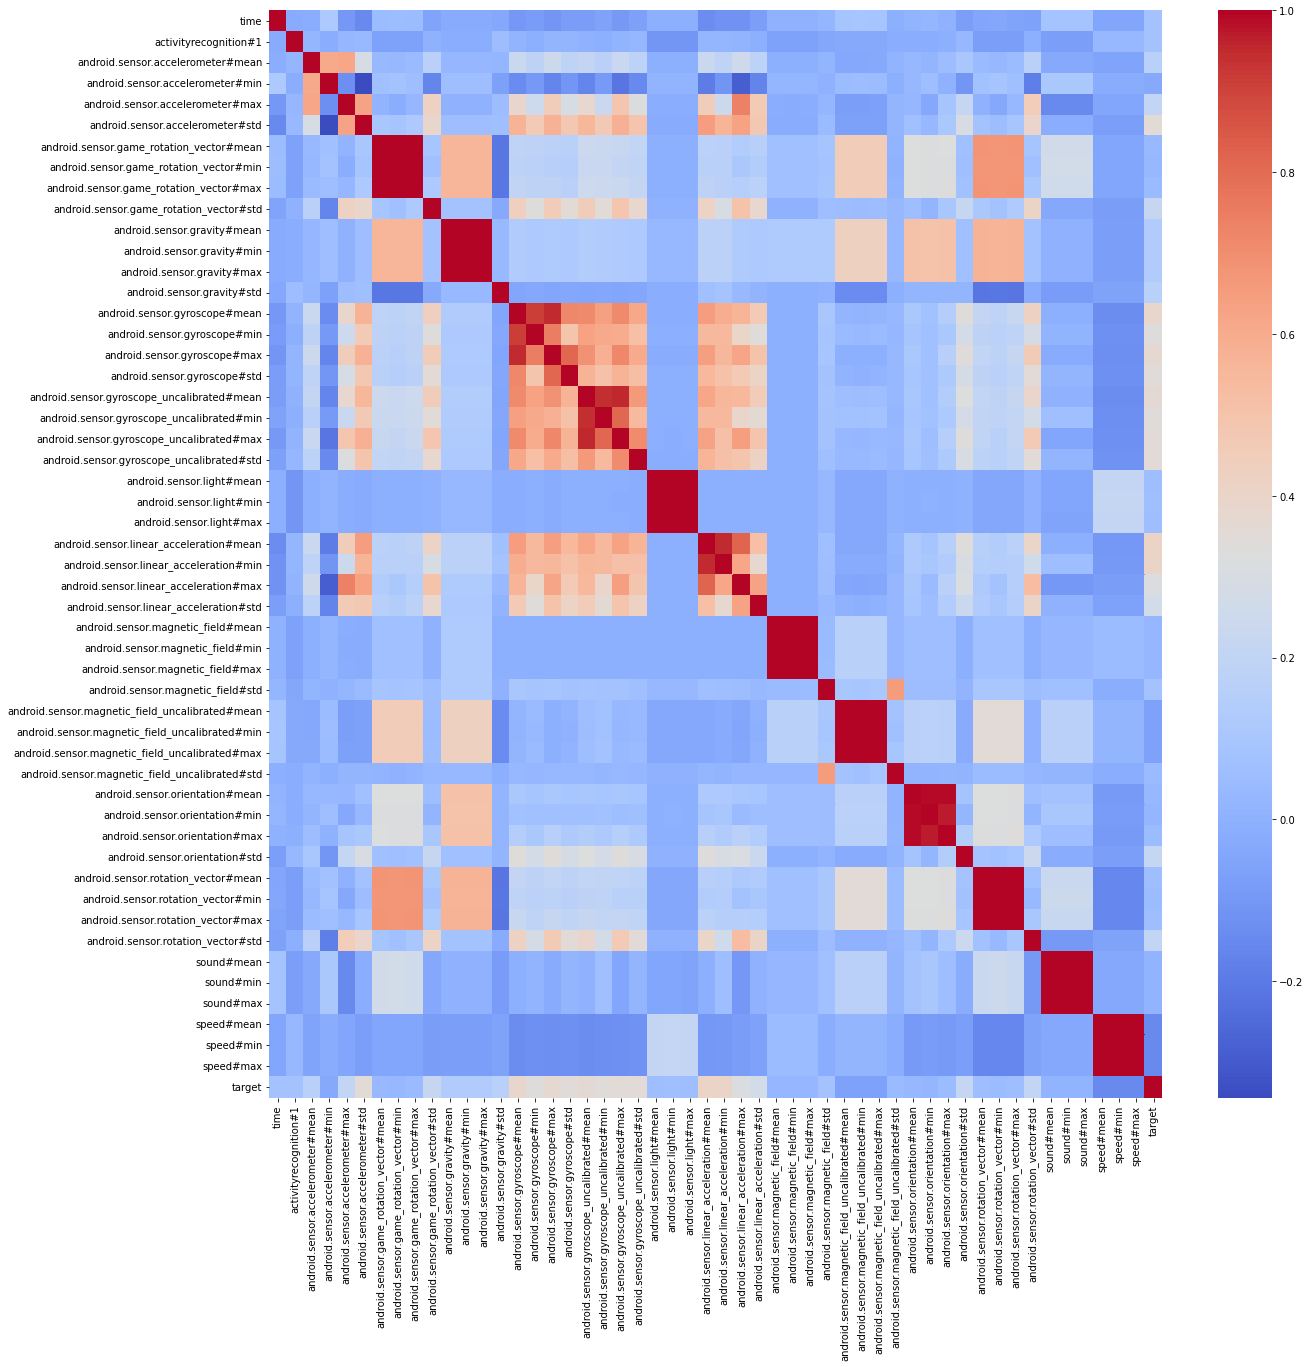

In [ ]:
corr = df.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

27

In [ ]:
corr_features

{'android.sensor.game_rotation_vector#max',
 'android.sensor.game_rotation_vector#min',
 'android.sensor.gravity#max',
 'android.sensor.gravity#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#std',
 'android.sensor.gyroscope_uncalibrated#max',
 'android.sensor.gyroscope_uncalibrated#mean',
 'android.sensor.gyroscope_uncalibrated#min',
 'android.sensor.gyroscope_uncalibrated#std',
 'android.sensor.light#max',
 'android.sensor.light#min',
 'android.sensor.linear_acceleration#max',
 'android.sensor.linear_acceleration#min',
 'android.sensor.magnetic_field#max',
 'android.sensor.magnetic_field#min',
 'android.sensor.magnetic_field_uncalibrated#max',
 'android.sensor.magnetic_field_uncalibrated#min',
 'android.sensor.orientation#max',
 'android.sensor.orientation#min',
 'android.sensor.rotation_vector#max',
 'android.sensor.rotation_vector#min',
 'sound#max',
 'sound#min',
 'speed#max',
 'speed#min'}

In [ ]:
df1 = df.drop(corr_features,axis=1)

In [ ]:
df1

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.magnetic_field#std,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean,target
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,0.655650,38.660465,3.515975,69.212414,20.480671,0.551880,0.137706,0.000000,0.00,0
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,0.890534,61.175710,6.865865,147.052105,18.099960,0.943359,0.046025,0.000000,0.00,0
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,0.706742,72.826001,0.620963,138.203285,14.463783,0.943879,0.026574,0.000000,0.00,0
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,0.116360,69.046004,2.365450,147.486429,20.478035,0.911758,0.014528,0.000000,0.00,0
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,0.239648,69.424097,3.585474,142.051738,23.746712,0.926211,0.021917,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,0.407428,79.829254,0.175239,356.129645,0.098269,0.837442,0.000220,89.761985,0.00,4
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,0.572358,177.278007,0.453734,197.447131,5.171732,0.980068,0.002820,89.747010,1.50,4
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,0.352223,160.922798,0.052567,208.464276,36.220598,0.978259,0.000834,89.729460,0.00,4
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,3.812070,119.849556,3.641726,122.660341,1.452735,0.787902,0.012880,89.778343,1.00,4


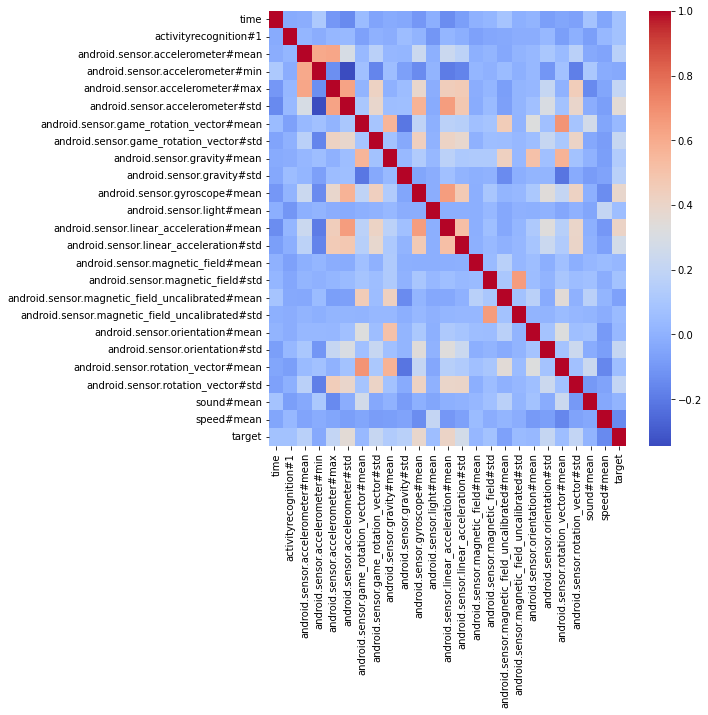

In [ ]:
corr = df1.corr()

plt.figure(figsize=(8,8))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')

#enc_df = pd.DataFrame(enc.fit_transform(df1[['target']]).toarray())

#final_df = df1.join(enc_df)

In [ ]:
final_df = df1

In [ ]:
final_df

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.magnetic_field#std,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean,target
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,0.655650,38.660465,3.515975,69.212414,20.480671,0.551880,0.137706,0.000000,0.00,0
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,0.890534,61.175710,6.865865,147.052105,18.099960,0.943359,0.046025,0.000000,0.00,0
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,0.706742,72.826001,0.620963,138.203285,14.463783,0.943879,0.026574,0.000000,0.00,0
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,0.116360,69.046004,2.365450,147.486429,20.478035,0.911758,0.014528,0.000000,0.00,0
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,0.239648,69.424097,3.585474,142.051738,23.746712,0.926211,0.021917,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,0.407428,79.829254,0.175239,356.129645,0.098269,0.837442,0.000220,89.761985,0.00,4
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,0.572358,177.278007,0.453734,197.447131,5.171732,0.980068,0.002820,89.747010,1.50,4
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,0.352223,160.922798,0.052567,208.464276,36.220598,0.978259,0.000834,89.729460,0.00,4
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,3.812070,119.849556,3.641726,122.660341,1.452735,0.787902,0.012880,89.778343,1.00,4


In [ ]:
X = final_df.iloc[:,0:24] 
y = final_df.iloc[:,24]

In [ ]:
X

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.magnetic_field#mean,android.sensor.magnetic_field#std,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,26.294306,0.655650,38.660465,3.515975,69.212414,20.480671,0.551880,0.137706,0.000000,0.00
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,26.295125,0.890534,61.175710,6.865865,147.052105,18.099960,0.943359,0.046025,0.000000,0.00
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,27.048843,0.706742,72.826001,0.620963,138.203285,14.463783,0.943879,0.026574,0.000000,0.00
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,25.878591,0.116360,69.046004,2.365450,147.486429,20.478035,0.911758,0.014528,0.000000,0.00
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,25.599663,0.239648,69.424097,3.585474,142.051738,23.746712,0.926211,0.021917,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,47.952133,0.407428,79.829254,0.175239,356.129645,0.098269,0.837442,0.000220,89.761985,0.00
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,39.067852,0.572358,177.278007,0.453734,197.447131,5.171732,0.980068,0.002820,89.747010,1.50
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,44.275992,0.352223,160.922798,0.052567,208.464276,36.220598,0.978259,0.000834,89.729460,0.00
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,59.172471,3.812070,119.849556,3.641726,122.660341,1.452735,0.787902,0.012880,89.778343,1.00


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62580    4
62581    4
62582    4
62583    4
62584    4
Name: target, Length: 62585, dtype: int64

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
from sklearn.preprocessing import MinMaxScaler   #min max scaling

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X_scaled = scaler.transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_scaled,y,test_size=0.20)

In [ ]:
y_train.shape

(50068,)

In [ ]:
from re import L

def create_clients(feature_list, label_list, num_clients=5, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as 
                data shards - tuple of features and label lists.
        args: 
            feature_list: a list of numpy arrays of training features
            label_list:a list of binarized labels for each feature
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1 
            
    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    print(len(feature_list))
    print(len(label_list))
    data = list(zip(feature_list, label_list))
    print(len(data))
    random.shuffle(data)
    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))} 

In [ ]:
X_train.shape

(50068, 24)

In [ ]:

#create clients
clients = create_clients(X_train, y_train, num_clients=5, initial='client')

50068
50068
50068


In [ ]:
len(clients['client_3'])

10013

In [ ]:
def batch_data(data_shard, bs=32):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

In [ ]:

#process and batch the training data for each client
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)
    
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [ ]:
class SimpleMLP:
    @staticmethod
    def build(shape, classes):
        model = Sequential()
        model.add(Dense(256, input_shape=(24,)))
        model.add(Activation("relu"))
        model.add(Dropout(0.40))
        model.add(Dense(256))
        model.add(Activation("relu"))
        model.add(Dropout(0.40))
        model.add(Dense(5))
        model.add(Activation("softmax"))
        return model

In [ ]:

lr = 0.01 
comms_round = 200
loss='sparse_categorical_crossentropy'
metrics = ['sparse_categorical_accuracy']
optimizer = SGD(learning_rate=lr, 
                decay=lr / comms_round, 
                momentum=0.9)   

In [ ]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad


def test_model(X_test, Y_test,  model1, model2, model3, comm_round):
    y_pred = []
    cce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits1 = model1.predict(X_test)
    logits2 = model2.predict(X_test)
    logits3 = model3.predict(X_test)
    #print(Y_test)
    c1 = tf.argmax(logits1, axis=1).numpy()
    #c2 = tf.argmax(logits2, axis=1)
    #c3 = tf.argmax(logits3, axis=1)
    #c1 = logits1
    c2 = logits2
    c3 = logits3
    print(c1)
    print(c2)
    print(c3)
    for i in range(len(c1)):
        tmp = []
        tmp.append(c1[i])
        tmp.append(c2[i])
        tmp.append(c3[i])
        #print(tmp)
        y_pred.append(np.bincount(tmp).argmax())
    Y_test = np.squeeze(Y_test)

    y_pred = np.array(y_pred)



    acc = accuracy_score(y_pred, Y_test)
    print(y_pred.shape)
    print(Y_test.shape)
    #loss = cce(y_pred, Y_test)

    print('comm_round: {} | global_acc: {:.3%}'.format(comm_round, acc))
    cf=classification_report(Y_test,y_pred)
    print(cf)
    return acc, loss

In [ ]:
#initialize global model
smlp_global = SimpleMLP()
global_model1 = smlp_global.build(24, 5)
global_model2 = XGBClassifier()
global_model3 = RandomForestClassifier()

local_model2 = XGBClassifier()
local_model3 = RandomForestClassifier() 


#commence global training loop
for comm_round in range(comms_round):
            
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights1 = global_model1.get_weights()
    #global_weights2 = global_model2.get_weights()
    #global_weights3 = global_model3.get_weights()   # what happens to the rest of the weights? #
    #collect weights for XGB
    #collect weights for RF

    #initial list to collect local model weights after scalling
    scaled_local_weight_list1 = list()
    #scaled_local_weight_list2 = list()
    #scaled_local_weight_list3 = list()
    #list for XGB
    #list for RF

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        #print(4)
        smlp_local = SimpleMLP()
        local_model1 = smlp_local.build(24, 5)
        local_model1.compile(loss=loss, 
                      optimizer=optimizer, 
                      metrics=metrics)
        
        
        #set local model weight to the weight of the global model
        local_model1.set_weights(global_weights1)  
        #local_model2.set_weights(global_weights2) 
        #local_model3.set_weights(global_weights3)   # what happens to the rest of the weights? #
        #set weights for the other two
        #print(clients_batched[client])
        Samples = []
        labels = []

        for x,y in clients_batched[client]:
            temp = x.numpy().tolist()
            temp2 = y.numpy().tolist()
            for i in temp:
                Samples.append(i)
            for i in temp2:
                labels.append(i)
        arr = np.array(Samples)
        labelpd = pd.Series(labels)
        #local_model1.fit(clients_batched[client], epochs=1, verbose=1)
        local_model1.fit(arr, labelpd, epochs=1, verbose=1)
        local_model2.fit(arr, labelpd)
        local_model3.fit(arr, labelpd)      

        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights1 = scale_model_weights(local_model1.get_weights(), scaling_factor)  # what happens here? #
        #scaled_weights2 = scale_model_weights(local_model2.get_weights(), scaling_factor) 
        #scaled_weights3 = scale_model_weights(local_model3.get_weights(), scaling_factor) 
        scaled_local_weight_list1.append(scaled_weights1)
        #scaled_local_weight_list2.append(scaled_weights2)
        #scaled_local_weight_list3.append(scaled_weights3)
        
        #clear session to free memory after each communication round
        K.clear_session()
    global_model2 = local_model2
    global_model3 = local_model3
     
    #to get the average over all the local model, we simply take the sum of the scaled weights
    average_weights1 = sum_scaled_weights(scaled_local_weight_list1)
    #average_weights2 = sum_scaled_weights(scaled_local_weight_list2)
    #average_weights3 = sum_scaled_weights(scaled_local_weight_list3)
    #print(average_weights)
    #update global model 
    global_model1.set_weights(average_weights1)
    #global_model2.set_weights(average_weights2)
    #global_model3.set_weights(average_weights3)

    #test global model and print out metrics after each communications round
    for(X_test, Y_test) in test_batched:
        #joblib.dump(pipeline, "xgb1.joblib.dat")
        #loaded_model = joblib.load("xgb1.joblib.dat")
        global_acc, global_loss = test_model(X_test, Y_test, global_model1, global_model2, global_model3, comm_round)  # which global model to pass here? #

392/392 [==============================] - 1s 1ms/step
[2 4 3 ... 4 1 2]
[2 4 0 ... 4 1 2]
[2 4 0 ... 4 1 2]
(12517,)
(12517,)
comm_round: 0 | global_acc: 96.173%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      2517
           1       0.97      0.93      0.95      2512
           2       0.97      0.98      0.98      2528
           3       0.99      0.96      0.98      2490
           4       0.96      0.96      0.96      2470

    accuracy                           0.96     12517
   macro avg       0.96      0.96      0.96     12517
weighted avg       0.96      0.96      0.96     12517

392/392 [==============================] - 1s 1ms/step
[2 4 0 ... 4 1 2]
[2 4 0 ... 4 1 2]
[2 4 0 ... 4 1 2]
(12517,)
(12517,)
comm_round: 1 | global_acc: 96.485%
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2517
           1       0.96      0.94      0.95      2512
           2       0.9

In [ ]:
'''
Samples = []
labels = []

for x,y in clients_batched['client_1']:
    temp = x.numpy().tolist()
    temp2 = y.numpy().tolist()
    for i in temp:
        Samples.append(i)
    for i in temp2:
        labels.append(i)

arr = np.array(Samples)
print(arr)

           
labelpd = pd.Series(labels)
'''

"\nSamples = []\nlabels = []\n\nfor x,y in clients_batched['client_1']:\n    temp = x.numpy().tolist()\n    temp2 = y.numpy().tolist()\n    for i in temp:\n        Samples.append(i)\n    for i in temp2:\n        labels.append(i)\n\narr = np.array(Samples)\nprint(arr)\n\n           \nlabelpd = pd.Series(labels)\n"

In [ ]:
#labelpd

In [ ]:
clients_batched[client]

<BatchDataset element_spec=(TensorSpec(shape=(None, 24), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Previous Rounds

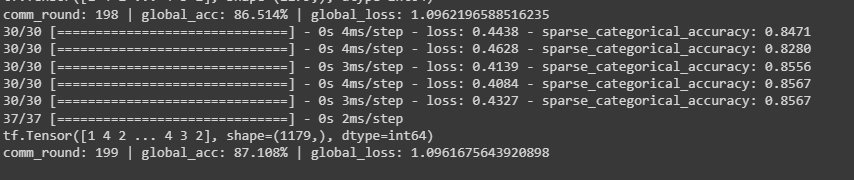